<IPython.core.display.Javascript object>


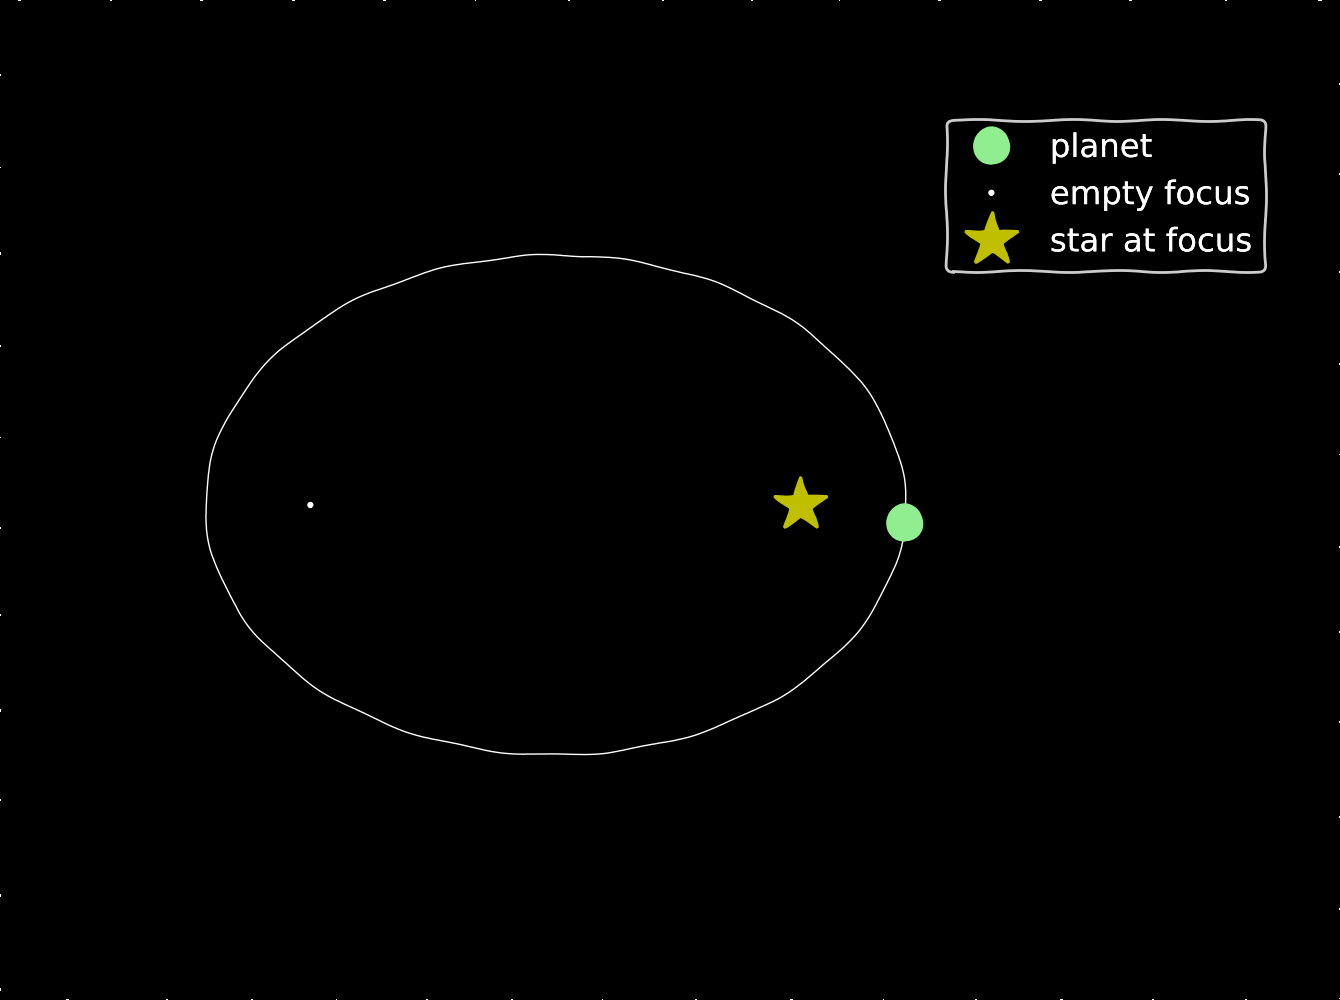

In [7]:
""" Kepler's Laws-1st Law
6m two-loop pass to grow then shrink the shaded areas
Trying out different formulae. This one works with e up to 0.95. It breaks for 0.99
Calculation and animation of eccentric and true anomalies from mean anomaly
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPatch
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from math import floor, factorial
%matplotlib notebook
with plt.xkcd():
    from matplotlib import patheffects

    plt.style.use(['dark_background'])
    plt.xkcd()
    plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=0)]

    plt.rcParams['figure.facecolor'] = 'black'

    TWOPI = 2*np.pi # numpy doesn't have tau (2π)

    plt.style.use('dark_background')
    fig = plt.figure(figsize=(6.7, 5), dpi=100)
    # xyticklabels=[-2,-1,0,1,2]
    xyticklabels=[]
    ax = plt.subplot(1,1,1,frameon=False,xticks=xyticklabels,yticks=xyticklabels,xlim=(-1.05,1.8),ylim=(-1.1,1.1))
    ax.set_yticklabels(xyticklabels)
    ax.set_xticklabels(xyticklabels)

    # e is eccentricity of the ellipse. e = |cf|/a, where |cf| is the distance from the center to a focus (=h, assuming no tilt) and a is the semimajor axis
    e = 0.7
    a = 1.0    # a is the semi-major axis

    # Finding semi-minor axis, b given semi-major axis, a and eccentricity, e
    b = a*(1-e**2)**0.5

    # given a & e, you can find the focal distance c using e = c/a or c = ea
    c = e*a

    # given a & e and having calculated b, we can find horizontal offset, h, and vertical, k
    if b<a:
        k = 0
        h = (a**2-b**2)**0.5
    elif a<b:
        h = 0
        k = (b**2-a**2)**0.5
    else: # a==b
        h = k = 0

    datapoints = 12000 # number of points to use for drawing the ellipse
    datastepsize = TWOPI/datapoints
    playbackpoints = 300
    #1200-151 # number of points to use when animating the planet
    playbackstepsize = TWOPI/playbackpoints

    # theta is the angle at the center of the ellipse from periapsis to a helper point, y, on the auxilliary circle
    theta = np.arange(0.0, TWOPI+datastepsize/2, datastepsize)

    # find the eccentric anomaly (angle) based on the mean anomaly
    def EA(M, n):
        EA = M
        for k in range(n):
            EA = EA + (M + e*np.sin(EA) - EA)*(1+e*np.cos(EA))/(1-e**2*(np.cos(EA))**2)
        return EA

    """ graveyard of failed formulas to find eccentric anomaly:
        theta = M + 2*e*sin(M) + (5/4)*e**2*sin(2*M) + e**3*((13/12)*sin(3*M)-(1/4)*sin(M)) # not sure why this doesn't work but ok, i'll step through M
        theta = np.zeros(datapoints, dtype=float)
        for i in M:
        #     theta[i] = M[i] + 2*e*sin(M[i]) + (5/4)*e**2*sin(2*M[i]) + e**3*((13/12)*sin(3*M[i])-(1/4)*sin(M[i]))
            print(f'step {i}: M[i]={M[i]} θ[i]={theta[i]}')
        with np.nditer(theta, op_flags=['readwrite']) as it:
            for m in it:
                m[...] = E(m, 1000)
               m[...] = m + m + (2*e-(1/4)*e**3)*np.sin(m)+((5/4)*e**2)*np.sin(2*m)+((13/12)*e**3)*np.sin(3*m)
                m[...] = m + 2*e*np.sin(m) + (5/4)*e**2*np.sin(2*m) + e**3*((13/12)*np.sin(3*m)-(1/4)*np.sin(m))
                m[...] = TWOPI*(1+2*e*np.cos(m)+(5/2)*e**2*np.cos(2*m)+e**3*((13/4)*np.cos(3*m)-(1/4)*np.cos(m)))
        M = np.arange(0.0, TWOPI, datastepsize) # M is Newton's Mean Anomoly, values from 0 to 2π in increments of datastepsize
            analytical solution from Tokis, A Solution of Kepler’s Equation, https://www.scirp.org/pdf/IJAA_2014123013365071.pdf
        E = M + (e**2-(1-(1-e)*(1+e*M**2/(1-e)**3)**0.5)**2)**0.5
        # given mean anomaly, return the eccentric anomaly, from http://pepijndevos.nl/2015/02/05/simulating-the-solar-system.html
        def solve_kepler(eccentricity, mean_anomaly):
            # for the approximate formulae in the present context, tol = 10e-6 degrees is sufficient
            tolerance = 10e-6
            # E0 = M + e sin M
            eccentric_anomaly = mean_anomaly + (eccentricity * np.sin(mean_anomaly))
            # and iterate the following equations with n = 0,1,2,... until |delta E| <= tol
            while True:
                ax.set_title('M={:.3} E={:.3} ∆E={:.3} e={:.3}'.format(mean_anomaly,eccentric_anomaly,delta_eccentric_anomaly,e),fontsize=12)
                # delta M = M - (En - e sin En)
                delta_mean_anomaly = mean_anomaly - (eccentric_anomaly - (eccentricity * math.sin(eccentric_anomaly)))
                # delta E = delta M / (1 - e cos En)
                delta_eccentric_anomaly = delta_mean_anomaly / (1 - (eccentricity * math.cos(eccentric_anomaly)))
                # En+1 = En + delta E
                eccentric_anomaly += delta_eccentric_anomaly
                 print('eccentric anomaly: {} ∆: {}'.format(eccentric_anomaly, delta_eccentric_anomaly))
                if abs(delta_eccentric_anomaly) <= tolerance:
                    return eccentric_anomaly

        E = solve_kepler(e, M)
        E = M + 2*e*np.sin(M) + (5/4)*e**2*np.sin(2*M) + e**3*((13/12)*np.sin(3*M)-(1/4)*np.sin(M))
        E = M+ (e**2-(1-(1-e)*(1+e*M**2/(1-e)**3)**0.5)**2)**0.5 # eqs. 40 & 41 from Tokis, A Solution of Kepler’s Equation
        .
        .
        .
        sigh...
    """
    # calculate x and y for a circle in cartesian coordinates:
    xcircle = np.cos(theta)
    ycircle = np.sin(theta)

    xellipse = xcircle       # ellipse x values from -1 to 1
    yellipse = (b/a)*ycircle # ellipse y values from -1 to 1

    ax.set_aspect('equal') # makes the circle look like a circle
    #     cir = plt.plot(xcircle, ycircle, 'k-', linewidth=0.1, label='auxiliary circle')
    #     ell = plt.plot(xellipse, yellipse, 'b-', linewidth=0.5, label='ellipse (e={:.3})'.format(e))
    ell = plt.plot(xellipse, yellipse, 'w-', linewidth=0.5)

    # quick experiment to find which coordinates to use for text
    # for i in range(10):
    #     ax.text(i/10, 1-i/10, 'left top at {}'.format(i/10),
    #         horizontalalignment='left',
    #         verticalalignment='top',
    #         transform=ax.transAxes)

    # 'a=semimajor axis'
#     ax.text(0.77, 0.35, 'a=semi-major axis',
#             horizontalalignment='left',
#             verticalalignment='top',
#             transform=ax.transAxes,
#             fontsize='small',
#            )

    # 'b=semiminor axis'
#     ax.text(0.77, 0.28, 'b=semi-minor axis',
#             horizontalalignment='left',
#             verticalalignment='top',
#             transform=ax.transAxes,
#             fontsize='small',
#            )

    # aLine,  = plt.plot((0,xcircle[0]), (0,ycircle[0]), 'k:', linewidth=0.5) # static line from center to periapsis
    #     xpLine, = plt.plot((xcircle[0],xellipse[0]), (ycircle[0],yellipse[0]), 'k:', linewidth=0.5) # line connecting point x with planet p
    #     pLine,  = plt.plot((h,xellipse[0]),(k,yellipse[0]), 'k-', linewidth=0.5) # line connecting the sun and planet
#     yLine,  = plt.plot((0,xcircle[0]), (0,ycircle[0]), 'w:', linewidth=0.5) # moves with yDot showing mean anomaly
#     bLine,  = plt.plot((0,0), (0,b*np.sin(np.pi/2)), 'w:', linewidth=0.5) # static (not animated)
    #     xDot,   = plt.plot([xcircle[0]], [ycircle[0]], 'r.', markersize=10) # helper of angle==ecc. anomaly along circle
    #     yDot,   = plt.plot([xcircle[0]], [ycircle[0]], 'g.', markersize=10) # helper of angle==mean anomaly along circle
    pDot,   = plt.plot([xellipse[0]], [yellipse[0]], '.', color='lightgreen', markersize=25, label='planet') # location of planet
    focus0  = plt.plot(-h, -k, 'w. ', markersize=2, label='empty focus') # location of the "empty" focus
    focus1  = plt.plot(h, k, 'y* ', markersize=20, label='star at focus') # plot the location of the star next (so it appears above the "empty" focus if they overlap)

    # make a polygon to show the area of the wedge described by focus1-periapsis-xDot
    #     xyPoly = [(h,0), (a,0)] # (x,y) starting point for the polygon located at periapsis
    #     xPoly = mpatches.Polygon(xyPoly, closed=True, edgecolor="black", facecolor='xkcd:light blue', alpha=0.1, label='area of x wedge =', animated=False)

    # and a wedge described by the center-periapsis-yDot
    #     yWedge = mpatches.Wedge(center=(0,0), r=1, theta1=0, theta2=0, edgecolor="black", facecolor='xkcd:very light purple', alpha=0.1, label='area of y wedge', animated=False)

    # Wedge and Polygon patches don't get added to the legend automatically so we'll have to do it
    handles, labels = ax.get_legend_handles_labels()
    #     handles.append(xPoly)
    #     handles.append(yWedge)
    plt.legend(bbox_to_anchor=(1.08, 1), # bbox_to_anchor lets you set the legend outside the figure
               handles=handles,          # our updated list of handles
               loc='upper right',
               ncol=1,
               fontsize='small',
               borderaxespad=0.0,
               shadow=True,
              )

    xy = (xcircle[0], ycircle[0]) # initial location of labels for xDot and yDot

    #     xDotAnnotation = ax.annotate('x',
    #                                  xy=xy,  xycoords='data',
    #                                  xytext=xy, textcoords='data',
    #                                  horizontalalignment='center', verticalalignment='center',
    #                                 )

    #     yDotAnnotation = ax.annotate('y',
    #                                  xy=xy,  xycoords='data',
    #                                  xytext=xy, textcoords='data',
    #                                  horizontalalignment='center', verticalalignment='center',
    #                                 )

#     yLineAnnotation = ax.annotate('a',
#                                  xy=xy,  xycoords='data',
#                                  xytext=(xy[0]/2,xy[1]/2), textcoords='data',
#                                  horizontalalignment='right', verticalalignment='top',
#                                 )

#     bLineAnnotation = ax.annotate('b',
#                                  xy=(0, 0),  xycoords='data',
#                                  xytext=(0, b*np.sin(np.pi/2)/2), textcoords='data',
#                                  horizontalalignment='right', verticalalignment='center',
#                                  )

    # Create the init function that returns the objects that will change during the animation process
    def init():
    #         ax.add_patch(xPoly)
    #         ax.add_patch(yWedge)
        return pDot
    #         return pDot, yDot, yDotAnnotation, yLine, yLineAnnotation, xDot, xDotAnnotation, xpLine, pLine, xPoly, yWedge

    """
    Note that the value at x[-1] yields the last value in the numpy ndarray x.

    It's the same value as x[floor(1000*TWOPI)], so when we want to reference various
    values of x and y based on the iterator i with values from 0 to 2π the index of the
    array x or y is the floor of 1000*i. It's times 1000 because we initially used a step
    size of 1/1000 or 0.001. In the general case, it would be x[floor(i/datastepsize)].
    """

    def animate(radians): # we are iterating over the circle twice, from 0 to 4π
        M = radians       # M is the mean anomaly
        E = EA(M,20)

        xx = xcircle[floor((E/datastepsize)%datapoints)] # x position for xdot
        yx = ycircle[floor((E/datastepsize)%datapoints)] # y position for xdot

    #         if (radians<TWOPI): # grow shapes on 1st pass
    #             xyPoly.append((xx, yx))
    #             yWedge.set_theta2(M*360/TWOPI)
    #         else:               # shrink shapes on 2nd pass
    #             del(xyPoly[1])  # delete the 2nd item in the list because deleting xyPoly[0] removes the focus
    #             yWedge.set_theta1(M*360/TWOPI)

        xy = xcircle[floor((M/datastepsize)%datapoints)] # x position for ydot
        yy = ycircle[floor((M/datastepsize)%datapoints)] # y position for ydot

        xp = xx
        yp = yx*b/a # find the location of the planet, pDot by dropping the location of xDot vertically onto the ellipse

    #         yDotAnnotation.set_position((xy*1.1, yy*1.1)) # set the annotation outside the circle
    #         yLine.set_data((0,xy), (0,yy))
    #         yLineAnnotation.set_position((xy/2, yy/2))
    #         yDot.set_data(xy, yy)
    #         xDotAnnotation.set_position((xx*1.1, yx*1.1))
    #         xpLine.set_data((xx,xp), (yx,yp))
    #         xDot.set_data(xx, yx)
        pDot.set_data(xp,yp)
    #         pLine.set_data((h,xp),(k,yp))
    #         xPoly.set_xy(xyPoly)

        return pDot
    #         return pDot, yDot, yDotAnnotation, yLine, yLineAnnotation, xDot, xDotAnnotation, xpLine, pLine, xPoly, yWedge

    progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
    animation = FuncAnimation(fig, animate, 
                              frames=np.arange(0.0, TWOPI, playbackstepsize), # run the animation once around the circle
                              interval=1, blit=False, repeat=False, init_func=init)

    #     writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
    #     animation.save("kepler's 1st law.{:^2.2f}.{}.mp4".format(e,playbackpoints), writer=writer, 
    #                    progress_callback=progress_callback
    #                  ) #current directoryanimate


Object `'KWARGGS'` not found.
